<a href="https://colab.research.google.com/github/renatom01/predict_wage/blob/main/FIXED_lighhouse_wagePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all necessary libraries to develop the model.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report


Quick description of the data.

In [ ]:
df = pd.read_csv('/content/wage_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32560 non-null  int64 
 1   age             32560 non-null  int64 
 2   workclass       32560 non-null  object
 3   fnlwgt          32560 non-null  int64 
 4   education       32560 non-null  object
 5   education_num   32560 non-null  int64 
 6   marital_status  32560 non-null  object
 7   occupation      32560 non-null  object
 8   relationship    32560 non-null  object
 9   race            32560 non-null  object
 10  sex             32560 non-null  object
 11  capital_gain    32560 non-null  int64 
 12  capital_loss    32560 non-null  int64 
 13  hours_per_week  32560 non-null  int64 
 14  native_country  32560 non-null  object
 15  yearly_wage     32560 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [ ]:
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Looking at numerical attributes


In [ ]:
df.describe()

,Unnamed: 0,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,16279.500000,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,9399.406719,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8139.750000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,16279.500000,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,24419.250000,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,32559.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Look at a categorical attribute.

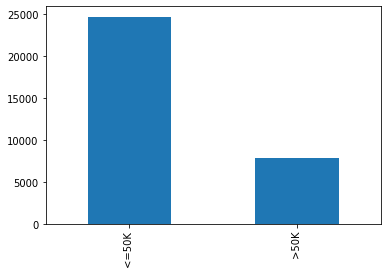

In [ ]:
df['yearly_wage'].value_counts().plot(kind='bar')

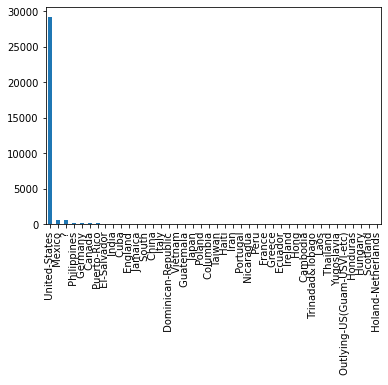

In [ ]:
df['native_country'].value_counts().plot(kind='bar')

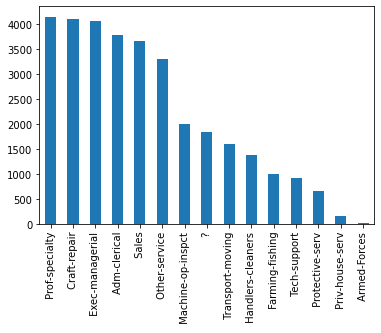

In [ ]:
df['occupation'].value_counts().plot(kind='bar')

Removing columns of line counts.

In [ ]:
wages_total = df.drop(['Unnamed: 0'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1fa036d50>,
      dtype=object)

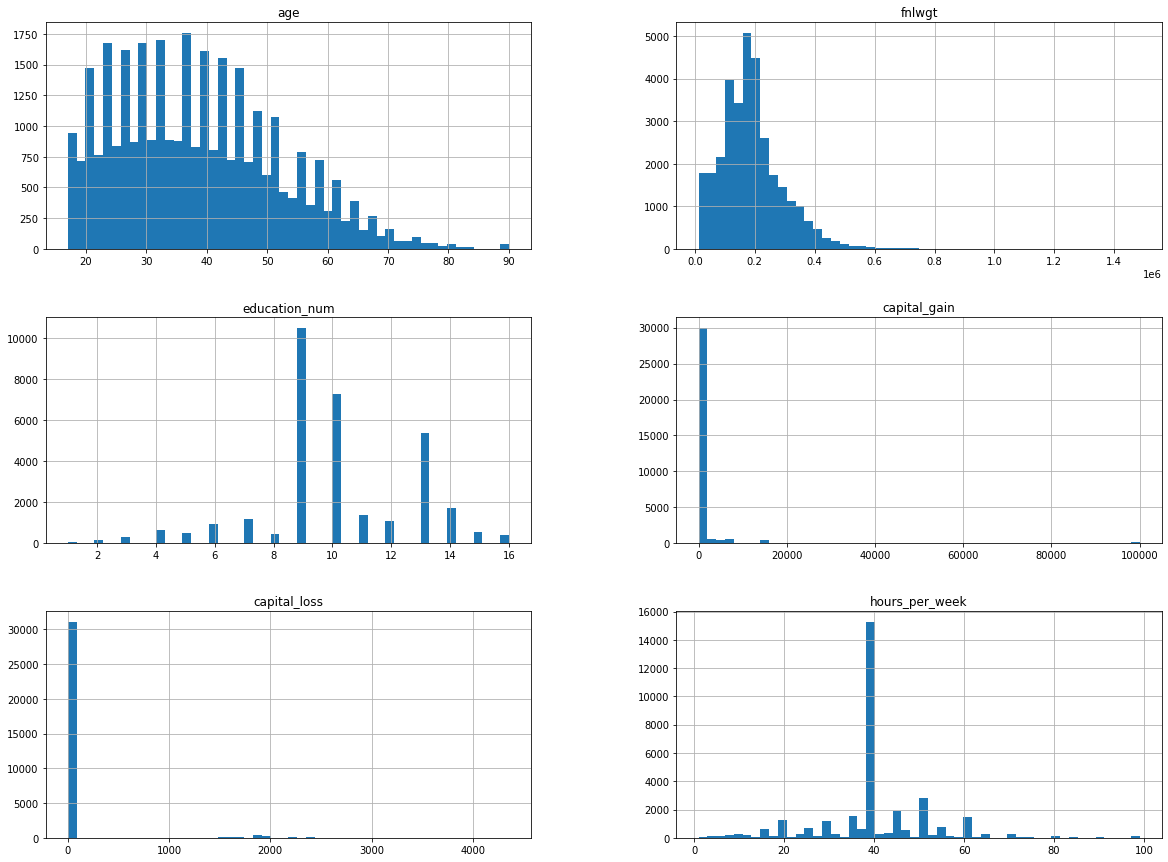

In [ ]:
wages_total.hist(bins=50, figsize=(20,15))

Data cleaning 
1. Delete unecessary features: the feature education was deleted since the education_num also represents the influence of education on final wage

In [ ]:
wages_total = df.drop(['education','yearly_wage'], axis=1)



Converting Categorical Attributes into numerical

In [ ]:
ordinal_encoder = OrdinalEncoder()
features = ['workclass','marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
wages_total[features]= ordinal_encoder.fit_transform(wages_total[features])                                                                                                  
wages_total.describe()

,Unnamed: 0,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
count,32560.000000,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,16279.500000,38.581634,3.868796,1.897818e+05,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796
std,9399.406719,13.640642,1.455879,1.055498e+05,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892
min,0.000000,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8139.750000,28.000000,4.000000,1.178315e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,16279.500000,37.000000,4.000000,1.783630e+05,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,24419.250000,48.000000,4.000000,2.370545e+05,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,32559.000000,90.000000,8.000000,1.484705e+06,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


In [ ]:
wages_encoded = wages_total.drop(['Unnamed: 0'], axis=1)
wages_encoded.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,50,6.0,83311,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0
1,38,4.0,215646,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0
2,53,4.0,234721,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0
3,28,4.0,338409,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0
4,37,4.0,284582,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0


ML models do not work weel on data varying a lot between features, for that reason the data needs to be scaled.

In [ ]:
scaler = MinMaxScaler()
wages_NParray = scaler.fit_transform(wages_encoded)
wages_scaled = pd.DataFrame(wages_NParray, columns=wages_encoded.columns)
wages_scaled.describe()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,0.295639,0.483600,0.120548,0.605373,0.435299,0.469494,0.289275,0.916462,0.669195,0.010776,0.020043,0.402423,0.895580
std,0.186858,0.181985,0.071685,0.171514,0.251038,0.302058,0.321359,0.212204,0.470510,0.073855,0.092508,0.125996,0.190827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.500000,0.071682,0.533333,0.333333,0.214286,0.000000,1.000000,0.000000,0.000000,0.000000,0.397959,0.951220
50%,0.273973,0.500000,0.112793,0.600000,0.333333,0.500000,0.200000,1.000000,1.000000,0.000000,0.000000,0.397959,0.951220
75%,0.424658,0.500000,0.152653,0.733333,0.666667,0.714286,0.600000,1.000000,1.000000,0.000000,0.000000,0.448980,0.951220
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


With preprocessing done, the data needs to be splitted into test and train set.

In [ ]:
yearly_wagesOri = df['yearly_wage']
wages_scaled['yearly_wage'] = yearly_wagesOri
wages_scaled.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,0.452055,0.75,0.048238,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.0,0.0,0.122449,0.951220,<=50K
1,0.287671,0.50,0.138113,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.0,0.0,0.397959,0.951220,<=50K
2,0.493151,0.50,0.151068,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.0,0.0,0.397959,0.951220,<=50K
3,0.150685,0.50,0.221488,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.0,0.0,0.397959,0.121951,<=50K
4,0.273973,0.50,0.184932,0.866667,0.333333,0.285714,1.0,1.0,0.0,0.0,0.0,0.397959,0.951220,<=50K


In [ ]:
train_set, test_set = train_test_split(wages_scaled, test_size=0.2, random_state=42)

In [ ]:
y_train = train_set['yearly_wage']
X_train = train_set.drop(['yearly_wage'], axis=1) 
y_test = test_set['yearly_wage']
X_test = test_set.drop(['yearly_wage'], axis=1) 

Training classification models.

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(X_train,y_train)
yPredTest = tree_clf.predict(X_test)
print(classification_report(y_test, yPredTest))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      4912
        >50K       0.75      0.61      0.67      1600

    accuracy                           0.85      6512
   macro avg       0.81      0.77      0.79      6512
weighted avg       0.85      0.85      0.85      6512



Cross validation of the trained model with test data set

Predicted better the 0 (<=50K) pq tinha mais instancias disponiveis.

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
yPredTestLR = log_reg.predict(X_test)
print(classification_report(y_test, yPredTestLR))

              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.88      4912
        >50K       0.70      0.44      0.54      1600

    accuracy                           0.82      6512
   macro avg       0.77      0.69      0.71      6512
weighted avg       0.80      0.82      0.80      6512



In [ ]:
rnd_clf = RandomForestClassifier(max_depth=20)
rnd_clf.fit(X_train,y_train)
yPredTestRF = rnd_clf.predict(X_test)
print(classification_report(y_test, yPredTestRF))

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      4912
        >50K       0.78      0.64      0.70      1600

    accuracy                           0.87      6512
   macro avg       0.83      0.79      0.81      6512
weighted avg       0.86      0.87      0.86      6512



In [ ]:
ada_clf = AdaBoostClassifier(
         DecisionTreeClassifier(max_depth=1), n_estimators=200,
         algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)
yPredTestAB = ada_clf.predict(X_test)
print(classification_report(y_test, yPredTestAB))

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      4912
        >50K       0.78      0.63      0.70      1600

    accuracy                           0.86      6512
   macro avg       0.83      0.78      0.80      6512
weighted avg       0.86      0.86      0.86      6512



In [ ]:
ada_clf = AdaBoostClassifier(
         DecisionTreeClassifier(max_depth=1), n_estimators=200,
         algorithm="SAMME.R", learning_rate=1.5)
ada_clf.fit(X_train, y_train)
yPredTestAB = ada_clf.predict(X_test)
print(classification_report(y_test, yPredTestAB))

              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      4912
        >50K       0.78      0.67      0.72      1600

    accuracy                           0.87      6512
   macro avg       0.84      0.80      0.82      6512
weighted avg       0.87      0.87      0.87      6512



Predicting the yearly wage from the Wage_test.csv using the best model (Adaboost Classifier), first the test set needs to be preprocessed as below: 

In [ ]:
df2 = pd.read_csv('/content/wage_test.csv')
dfTest= df2.drop(['education','Unnamed: 0'], axis=1)
featuresTest = ['workclass','marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
dfTest[features]= ordinal_encoder.fit_transform(dfTest[features])                                                                                                  
test_NParray = scaler.fit_transform(dfTest)
dfTest_scaled = pd.DataFrame(test_NParray, columns=dfTest.columns)
dfTest_scaled.describe()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
count,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000
mean,0.298196,0.484191,0.119128,0.604873,0.438749,0.470542,0.287408,0.918136,0.667015,0.010820,0.023317,0.401962,0.896405
std,0.189715,0.185091,0.071580,0.171167,0.251770,0.302432,0.318581,0.210063,0.471296,0.075842,0.106928,0.127344,0.187131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.500000,0.069892,0.533333,0.333333,0.214286,0.000000,1.000000,0.000000,0.000000,0.000000,0.397959,0.950000
50%,0.273973,0.500000,0.111271,0.600000,0.333333,0.500000,0.200000,1.000000,1.000000,0.000000,0.000000,0.397959,0.950000
75%,0.424658,0.500000,0.152272,0.733333,0.666667,0.714286,0.600000,1.000000,1.000000,0.000000,0.000000,0.448980,0.950000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
yPredAB = ada_clf.predict(dfTest_scaled)
yPredAB
pd.DataFrame(yPredAB).to_csv("PredictedYearlyWage")
